# Dump and reload example
This notebook illustrates how to dump a cancer simulation to disk, reload it, and continue with changed parameters. This feature allows to model different stages of tumour growth characterized by varying growth parameters (e.g. `death_probability` and `adv_mutant_division_probability`).

## Import modules 

In [1]:
# The cancer simulation module.
from casim import casim

In [2]:
#  3rd party modules.
import os, shutil
from wand.image import Image as WImage
from glob import glob

In [3]:
import pickle
from matplotlib import pyplot

## Define some utility functions

In [4]:
def unpickle(sim, pkl):

    with open(os.path.join(sim._CancerSimulator__simdir, pkl),'rb') as fp:
        return pickle.load(fp)

In [5]:
def clear_outdir(dir):
    if os.path.isdir(dir):
        shutil.rmtree(dir)

## Setup parameters 
Initially, cells with advantageous mutations divide only seldomly, the tumour is dormant.

In [22]:
parameters=casim.CancerSimulatorParameters(
                                matrix_size=200,
                                number_of_generations=50,
                                division_probability=0.6,
                                adv_mutant_division_probability=0.5,
                                death_probability=0.3,
                                adv_mutant_death_probability=0.05,
                                mutation_probability=0.5,
                                adv_mutant_mutation_probability=1.0,
                                number_of_mutations_per_division=10,
                                adv_mutation_wait_time=40,
                                number_of_initial_mutations=2,
                                sampling_fraction=0.9,
                                plot_tumour_growth=True,
                                export_tumour=True
                               )

## Setup the simulation engine. 

In [23]:
outdir = 'out'
clear_outdir(outdir)

In [24]:
cancer_sim = casim.CancerSimulator(parameters, seed=1, outdir='out/')

2020-08-19 12:29:15,983 INFO: Running in single tumour mode.
2020-08-19 12:29:15,985 INFO: First cell at (100, 100).


## Run the simulation 

In [25]:
cancer_sim.run()

2020-08-19 12:29:16,398 INFO: Ready to start CancerSim run with these parameters:
2020-08-19 12:29:16,400 INFO: matrix_size = 200
2020-08-19 12:29:16,401 INFO: number_of_generations = 50
2020-08-19 12:29:16,403 INFO: division_probability = 0.6
2020-08-19 12:29:16,404 INFO: adv_mutant_division_probability = 0.5
2020-08-19 12:29:16,405 INFO: death_probability = 0.3
2020-08-19 12:29:16,406 INFO: adv_mutant_death_probability = 0.05
2020-08-19 12:29:16,407 INFO: mutation_probability = 0.5
2020-08-19 12:29:16,409 INFO: adv_mutant_mutation_probability = 1.0
2020-08-19 12:29:16,410 INFO: number_of_mutations_per_division = 10
2020-08-19 12:29:16,411 INFO: adv_mutation_wait_time = 40
2020-08-19 12:29:16,412 INFO: number_of_initial_mutations = 2
2020-08-19 12:29:16,413 INFO: tumour_multiplicity = single
2020-08-19 12:29:16,414 INFO: read_depth = 100
2020-08-19 12:29:16,415 INFO: sampling_fraction = 0.9
2020-08-19 12:29:16,416 INFO: plot_tumour_growth = True
2020-08-19 12:29:16,418 INFO: export_tu

0

## Visualize the first stage of the run

In [26]:
pdfs = glob(os.path.join(cancer_sim.outdir,'cancer_1', 'simOutput',"*.pdf"))

out/cancer_1/simOutput/sampleHistogram_97_107.pdf


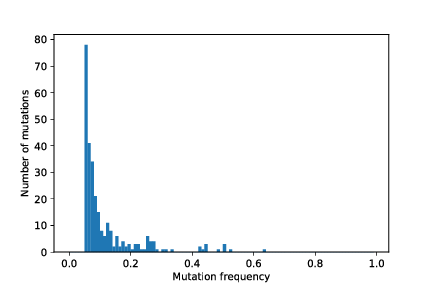

out/cancer_1/simOutput/growthCurve.pdf


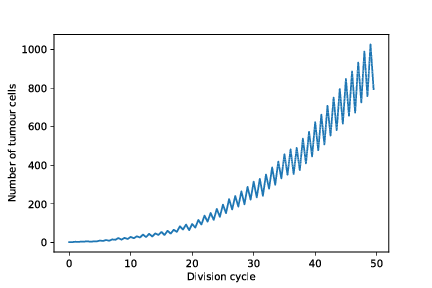

out/cancer_1/simOutput/wholeTumourVAFHistogram.pdf


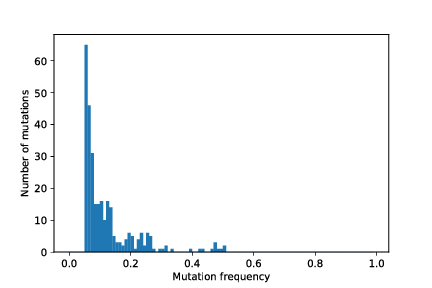

In [27]:
for pdf in pdfs:
    print(pdf)
    display(WImage(filename=pdf))

## Load the mutation matrix

In [28]:
mtx=unpickle(cancer_sim,'mtx.p').toarray()

## Plot the tumour as a 2D map color coding the mutation ID

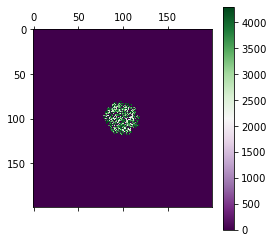

In [29]:
cmap = pyplot.cm.get_cmap('PRGn', mtx.max()+1)

pyplot.matshow(mtx, cmap=cmap)
pyplot.colorbar()

## Dump the simulation

In [30]:
cancer_sim.dump()

## Reload the simulation

In [31]:
restart_with_mods = casim.load_cancer_simulation(cancer_sim.dumpfile)

## Change adv. mutant properties and run for 20 more generations.

In [32]:
restart_with_mods.parameters.adv_mutant_division_probability = 1.0
restart_with_mods.parameters.death_probability = 0.5
restart_with_mods.parameters.number_of_generations = 20

In [33]:
outdir = 'restart_with_mods'
clear_outdir(outdir)

restart_with_mods.outdir = outdir

In [34]:
restart_with_mods.run()

2020-08-19 12:29:32,477 INFO: Ready to start CancerSim run with these parameters:
2020-08-19 12:29:32,479 INFO: matrix_size = 200
2020-08-19 12:29:32,481 INFO: number_of_generations = 20
2020-08-19 12:29:32,482 INFO: division_probability = 0.6
2020-08-19 12:29:32,483 INFO: adv_mutant_division_probability = 1.0
2020-08-19 12:29:32,485 INFO: death_probability = 0.5
2020-08-19 12:29:32,486 INFO: adv_mutant_death_probability = 0.05
2020-08-19 12:29:32,487 INFO: mutation_probability = 0.5
2020-08-19 12:29:32,489 INFO: adv_mutant_mutation_probability = 1.0
2020-08-19 12:29:32,490 INFO: number_of_mutations_per_division = 10
2020-08-19 12:29:32,491 INFO: adv_mutation_wait_time = 40
2020-08-19 12:29:32,492 INFO: number_of_initial_mutations = 2
2020-08-19 12:29:32,494 INFO: tumour_multiplicity = single
2020-08-19 12:29:32,495 INFO: read_depth = 100
2020-08-19 12:29:32,496 INFO: sampling_fraction = 0.9
2020-08-19 12:29:32,497 INFO: plot_tumour_growth = True
2020-08-19 12:29:32,498 INFO: export_tu

0

## Output

restart_with_mods/cancer_1/simOutput/growthCurve.pdf


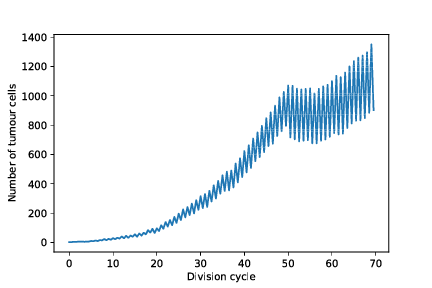

restart_with_mods/cancer_1/simOutput/wholeTumourVAFHistogram.pdf


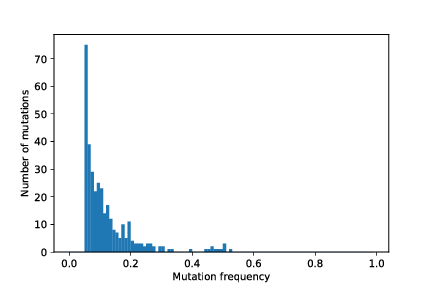

restart_with_mods/cancer_1/simOutput/sampleHistogram_86_78.pdf


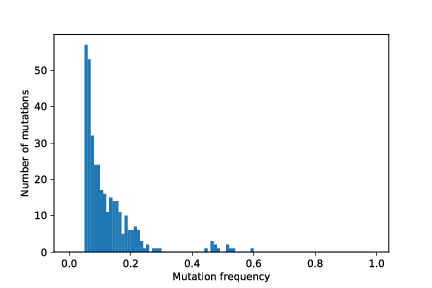

In [35]:
pdfs = glob(os.path.join(restart_with_mods.outdir,'cancer_1', 'simOutput',"*.pdf"))
for pdf in pdfs:
    print(pdf)
    display(WImage(filename=pdf))

In [20]:
# Load the mutation matrix
mtx=unpickle(restart_with_mods, 'mtx.p').toarray()

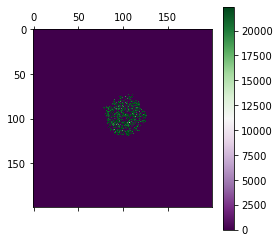

In [21]:
# Plot the tumour as a 2D map color coding the mutation ID
cmap = pyplot.cm.get_cmap('PRGn', mtx.max()+1)

pyplot.matshow(mtx, cmap=cmap)
pyplot.colorbar()